# Image Filtering and Edge Detection 


**Objectives:**
* Practising with different kinds of filters used in image filtering and getting experiences with the use of image filters
* Practising with the edge detection using Sobel filters and Canny edge detector

## Importing important packages and libraries ##

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### Image Filtering with a 5x5 averaging kernel ###

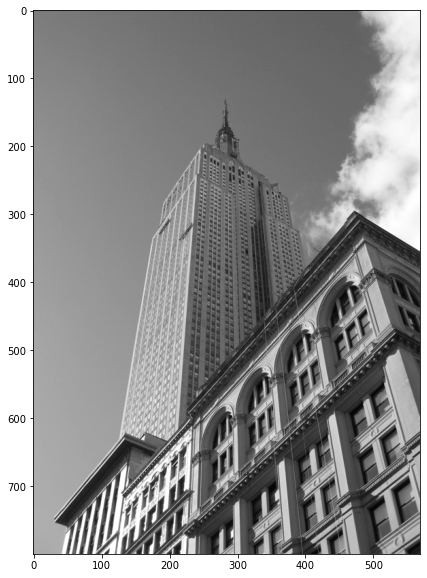

In [3]:
img = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-2.1P\Resources_2.1\empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

avg_kernel = np.ones((5,5), np.float32) / 25 #kernel K defined above
avg_result = cv.filter2D(img_gray, -1, avg_kernel) #always set the second parameter to -1

size = 15,10
plt.figure(figsize= size)
plt.imshow(img_gray, 'gray')

In [7]:
cv.imwrite('avg_kernelresult.png', avg_result)

True

### Image Filtering with Gaussian kernel ###

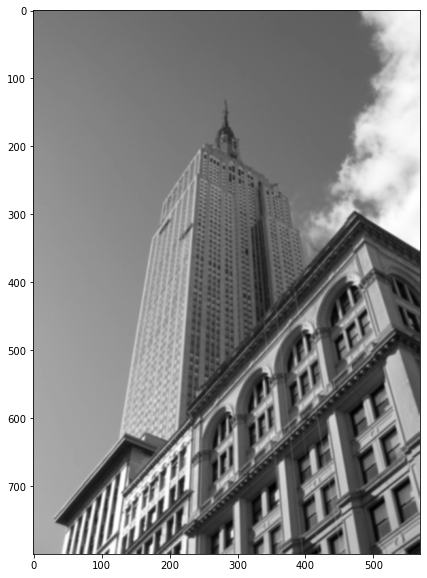

In [4]:
Gaussian_kernel = np.float32([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]]) / 256
Gaussian_result = cv.filter2D(img_gray, -1, Gaussian_kernel)

plt.figure(figsize= size)
plt.imshow(Gaussian_result, 'gray')

In [8]:
cv.imwrite('Gaussian_kernelresult.png', Gaussian_result)

True

### Image Filtering with Sobel kernel ###

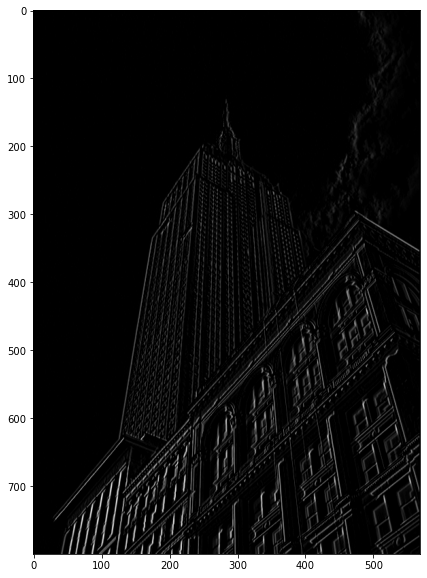

In [5]:
Sobel_kernel = np.float32([[-1,0,1], [-2,0,2], [-1,0,1]]) / 8
Sobel_result = cv.filter2D(img_gray, -1, Sobel_kernel)

plt.figure(figsize= size)
plt.imshow(Sobel_result, 'gray')

In [9]:
cv.imwrite('Sobel_kernelresult.png', Sobel_result)

True

### Image Filtering with Corner kernel ###

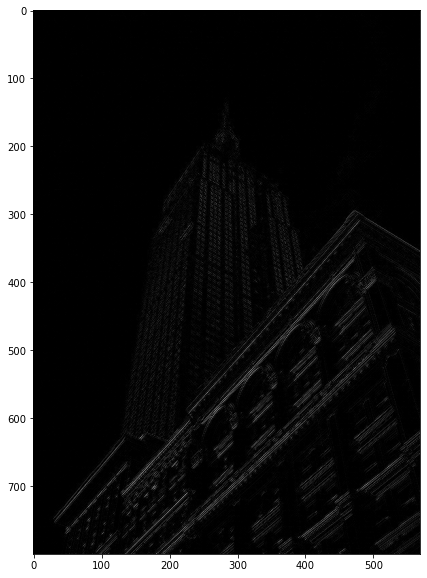

In [6]:
Corner_kernel = np.float32([[1,-2,1], [-2,4,-2], [1,-2,1]]) / 4
Corner_result = cv.filter2D(img_gray, -1, Corner_kernel)

plt.figure(figsize= size)
plt.imshow(Corner_result, 'gray')

In [10]:
cv.imwrite('Corner_kernelresult.png', Corner_result)

True

### Testing with Median Filter ###

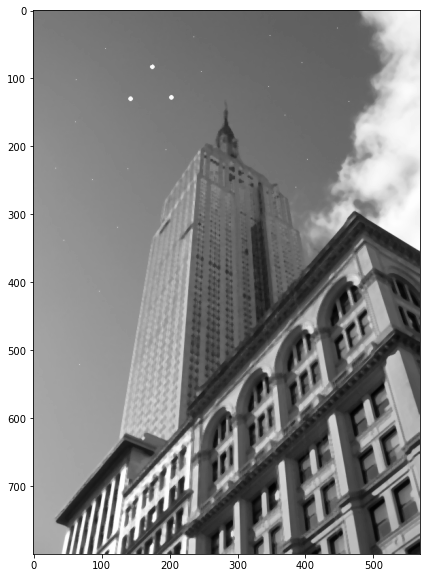

In [11]:
#Testing median filter
img_noise = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-2.1P\Resources_2.1\empire_shotnoise.jpg')
img_noise_gray = cv.cvtColor(img_noise, cv.COLOR_BGR2GRAY)

ksize = 5 # neighbourhood of ksize x ksize; ksize must be an odd number
med_result = cv.medianBlur(img_noise_gray, ksize)

plt.figure(figsize= size)
plt.imshow(med_result, 'gray')

In [12]:
cv.imwrite('median_result.png', med_result)

True

### Testing with Bilateral Filter ###

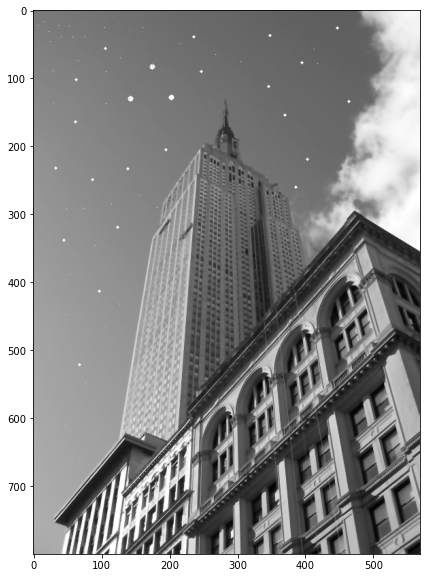

In [13]:
#Testing bilateral filter
rad = 5 #radius to determine neighbourhood
sigma_s = 10 #standard deviation for spatial distance 
sigma_c = 30 #standard deviation for colour difference 
bil_result = cv.bilateralFilter(img_noise_gray, rad, sigma_c, sigma_s)

plt.figure(figsize= size)
plt.imshow(bil_result, 'gray')

In [14]:
cv.imwrite('Bilateral_result.png', bil_result)

True

### Applying Gaussian Filter on 'img_noise_gray' ###

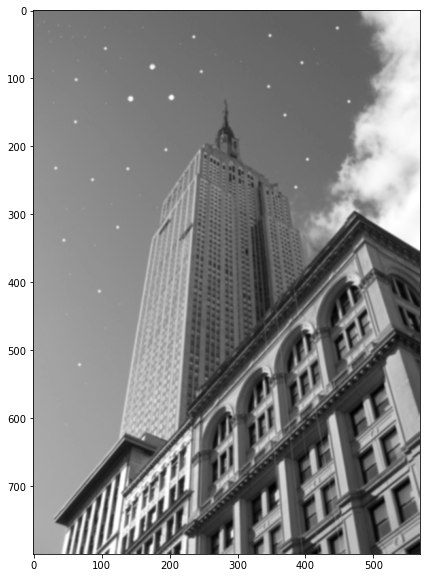

In [15]:
Gaussian_kernel = np.float32([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]]) / 256
Gaussian_result12 = cv.filter2D(img_noise_gray, -1, Gaussian_kernel)

plt.figure(figsize= size)
plt.imshow(Gaussian_result12, 'gray')

In [16]:
cv.imwrite('Gaussian_result12.png', Gaussian_result12)

True

**The Gaussian filtered image (Gaussian_result12) preserved the details of the original image while reducing the contrast and making the image a bit blurry. As compared to the Median filtered image (med_result), gaussian filtered image is more detailed, blurry and it kept the edges sharp while the median filtered image is having less noise but lacks sharpened edges at some areas like at the uppermost part of the building.**


**As compared to the Bilateral filtered image (bil_result), the gaussian image is having a lot of noise, blurry, lacks sharp edges and contrast while the Bilateral filtered image is very detailed with high contrast, sharp edges and less noise which makes it a better filter than gaussian filter.**

## Edge Detection ##

## Edge detection using Sobel kernels ##

### Horizontal derivative of 'img_gray' ###

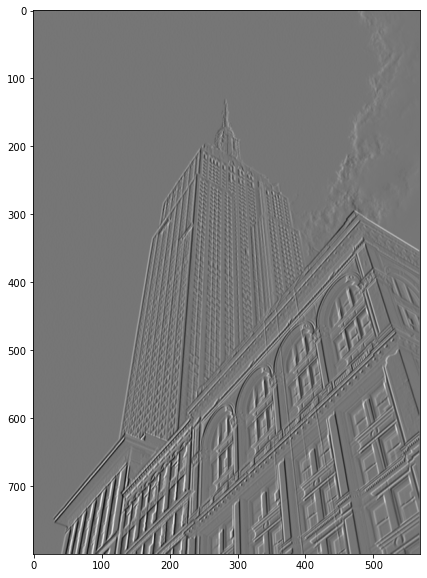

In [17]:
D_x = np.float32([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
der_x = cv.filter2D(img_gray, cv.CV_32F, D_x) #the 2nd parameter of filter2D is set to CV_32F to store negative values

plt.figure(figsize= size)
plt.imshow(der_x, 'gray')

In [21]:
cv.imwrite('Horizontal_derivative.png', der_x)

True

### Vertical derivative of 'img_gray' ###

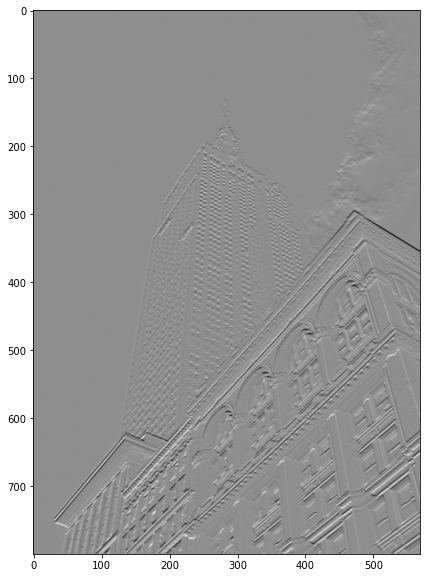

In [18]:
D_y = np.float32([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 8
der_y = cv.filter2D(img_gray, cv.CV_32F, D_y) #the 2nd parameter of filter2D is set to CV_32F to store negative values

plt.figure(figsize= size)
plt.imshow(der_y, 'gray')

In [22]:
cv.imwrite('vertical_derivative.png', der_y)

True

### To get the edges of 'img_gray', we can calculate the Gradient Magnitude of 'img_gray' as follows: ###

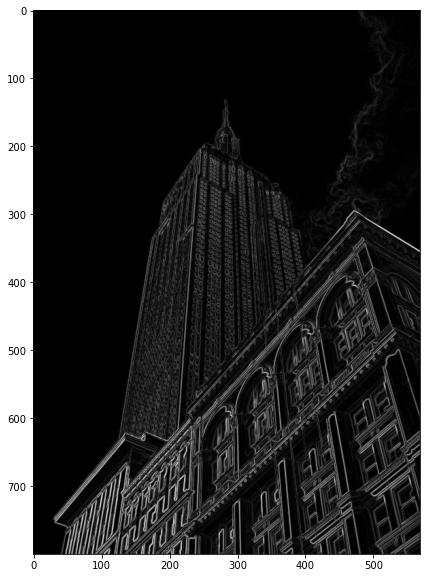

In [19]:
import math

height, width = img_gray.shape
mag_img_gray = np.zeros((height, width), np.float32) #gradient magnitude of img_gray

for i in range(0, height):
    for j in range(0, width):
        square_der_x = float(der_x[i, j]) * float(der_x[i, j])
        square_der_y = float(der_y[i, j]) * float(der_y[i, j])
        mag_img_gray[i, j] = int(math.sqrt(square_der_x + square_der_y))

plt.figure(figsize= size)
plt.imshow(mag_img_gray,'gray')

In [23]:
cv.imwrite('Gradient_magnitude.png', mag_img_gray)

True

### Edge detection with Canny edge detector ###

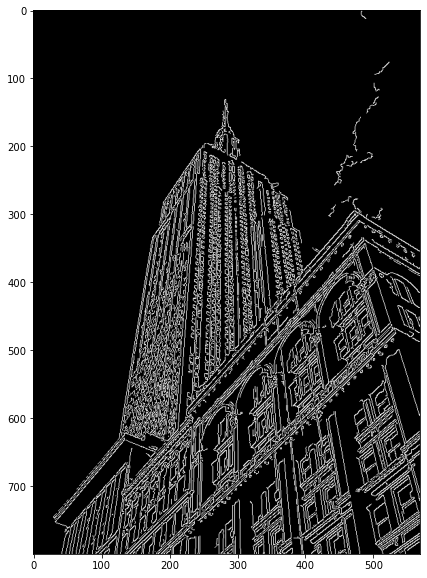

In [20]:
minVal = 100 #minVal used in hysteresis thresholding
maxVal = 200 #maxVal used in hysteresis thresholding

Canny_edges = cv.Canny(img_gray, minVal, maxVal)

plt.figure(figsize= size)
plt.imshow(Canny_edges, 'gray')

In [24]:
cv.imwrite('canny_edge.png', Canny_edges)

True

**The edge detection performed by Canny edge detector removes the noise from image by smoothening. The number of edges detected by canny edge detector is much more than the number of edges detected by sobel edge detector, means it works better than sobel edge detector.**